## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview


merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = len(pd.unique(merged_df['Mouse ID']))
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#I did this step in one shot above

In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.





grouped_df = merged_df.groupby(["Drug Regimen"])


mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
std_dev = grouped_df["Tumor Volume (mm3)"].std()
std_er = grouped_df["Tumor Volume (mm3)"].sem()

sum_stat = {
    
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std_dev,
    'SEM': std_er
}

sum_stat = pd.DataFrame(sum_stat)
sum_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

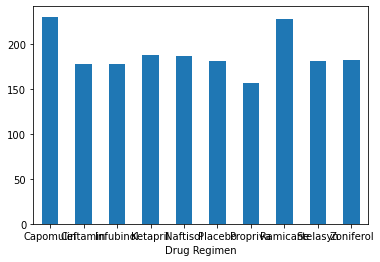

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tot_times = grouped_df["Timepoint"].count()
tot_times.plot.bar(rot=0)

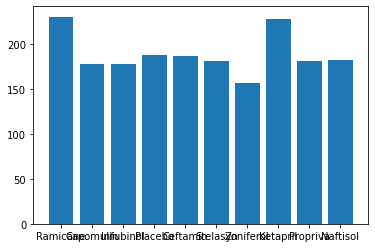

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#pybar = plt.bar(merged_df['Drug Regimen'], 300, data=tot_times)
drugs = list(merged_df['Drug Regimen'].unique())
pybar = plt.bar(drugs, tot_times)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#pie_group = merged_df.groupby(['Sex']).sum().plot(kind='pie', subplots=True)
male_count = merged_df.Sex.str.count('Male').sum()
female_count = merged_df.Sex.str.count('Female').sum()
male_count
female_count


pie_group.plot(kind='pie', y=male_count)

NameError: name 'pie_group' is not defined

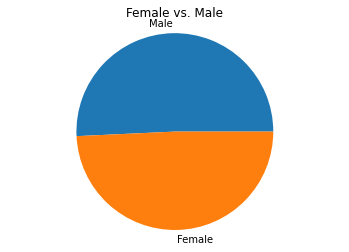

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_data = [male_count,female_count]
my_labels = 'Male','Female'
plt.pie(my_data,labels=my_labels)
plt.title('Female vs. Male')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_df = merged_df.groupby(["Mouse ID"])
last = mouse_df["Tumor Volume (mm3)"].last()
# Start by getting the last (greatest) timepoint for each mouse
last
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(merged_df, last, on="Mouse ID")
merged.rename(columns={"Tumor Volume (mm3)_y": "Final_Tumor_Volume"})

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Final_Tumor_Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845
1884,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845
1885,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845
1886,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845


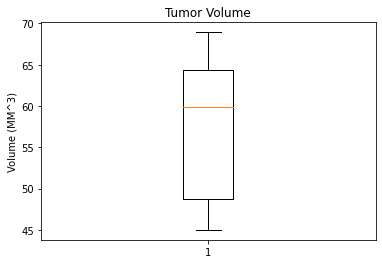

In [17]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_df = []

for treatment in treatment_list:
    tumor_df = merged.loc[(merged["Drug Regimen"] == treatment),:]
    tumor_df = tumor_df.sort_values("Timepoint")
    tumor_df = tumor_df.drop_duplicates(subset="Mouse ID", keep='first')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


quartiles = tumor_df['Tumor Volume (mm3)_y'].quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower
lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)

Tumor_Volume = tumor_df['Tumor Volume (mm3)_y']
figure, axis = plt.subplots()
axis.set_title('Tumor Volume') , axis.set_ylabel('Volume (MM^3)')
axis.boxplot(Tumor_Volume)
plt.show()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

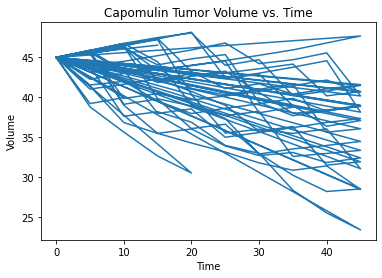

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = merged.loc[(merged["Drug Regimen"] == "Capomulin"),:]
tum_vol = line_df['Tumor Volume (mm3)_x']
time = line_df["Timepoint"]
plt.title('Capomulin Tumor Volume vs. Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.plot(time, tum_vol)
plt.show()


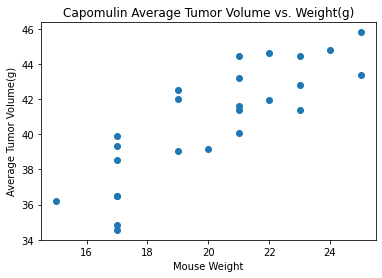

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_df = line_df.groupby(line_df["Mouse ID"])
weight = mouse_df["Weight (g)"].mean()
avg_tum = mouse_df['Tumor Volume (mm3)_x'].mean()
plt.title('Capomulin Average Tumor Volume vs. Weight(g)')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume(g)')
scatterplot = plt.scatter(weight,avg_tum)
scatterplot

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
